# Import Required Libraries
Import the necessary libraries, including NumPy, TensorFlow, and OpenCV.

In [3]:
# Import Required Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import cv2
from minisom import MiniSom

# Load and Preprocess MNIST Dataset
Load the MNIST dataset, normalize the images to the [0,1] range, and reshape them from (n_samples, 28, 28) to (n_samples, 784).

In [3]:
# Load and Preprocess MNIST Dataset

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
1
# Normalize to [0,1] range
X_train = X_train / 255.0

# Apply edge detection filter
X_train_edges = np.array([cv2.Canny(image.astype(np.uint8), 100, 200) for image in X_train])

# Reshape from (n_samples, 28, 28) to (n_samples, 784)
X_train_reshaped = X_train_edges.reshape(X_train_edges.shape[0], 784)

# Assign to Xi
Xi = X_train_reshaped

# Assign to Yi
Yi = y_train

print(Xi.shape)
print(Yi.shape)

(60000, 784)
(60000,)


# Apply Edge Detection Filter
Use OpenCV to apply an edge detection filter (e.g., Canny) to the MNIST images.

In [3]:
# Apply Edge Detection Filter
import cv2

# Apply edge detection filter
X_train_edges = np.array([cv2.Canny(image.astype(np.uint8), 100, 200) for image in X_train])

# Reshape from (n_samples, 28, 28) to (n_samples, 784)
X_train_reshaped = X_train_edges.reshape(X_train_edges.shape[0], 784)

# Assign to Xi
Xi = X_train_reshaped

# Assign to Yi
Yi = y_train

print(Xi.shape)
print(Yi.shape)

(60000, 784)
(60000,)


# Visualize Edge Detection Results
Display some of the original and edge-detected images side by side for comparison.

2024-12-13 23:16:58.983009: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 23:16:59.064428: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 23:16:59.139406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734149819.198192   44503 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734149819.215816   44503 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-13 23:16:59.379698: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

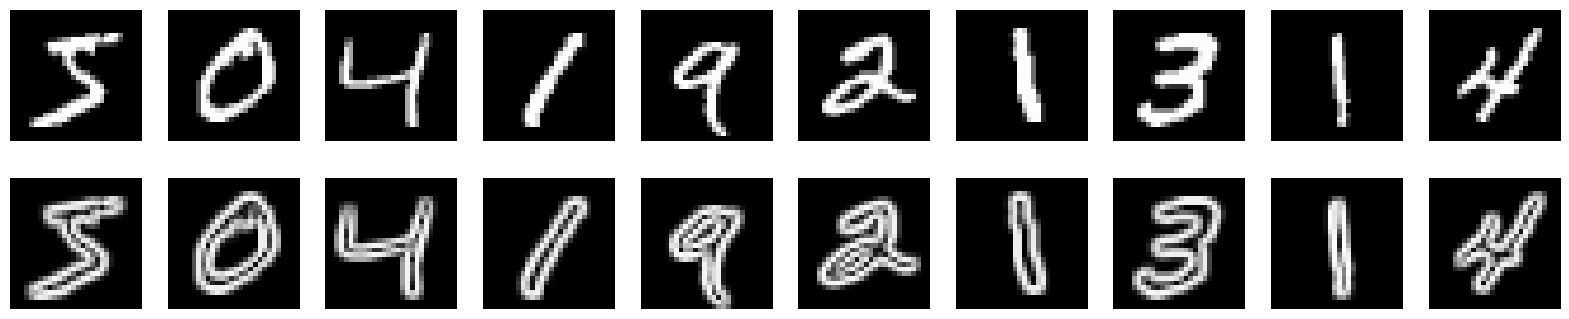

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from scipy.ndimage import sobel

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocesamiento: Normalizar a rango [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Aplicar el filtro Sobel para la detección de bordes
def apply_sobel_filter(images):
    edge_images = np.zeros_like(images)
    for i in range(images.shape[0]):
        sx = sobel(images[i], axis=0, mode='constant')
        sy = sobel(images[i], axis=1, mode='constant')
        edge_images[i] = np.hypot(sx, sy)
    return edge_images

X_train_edges = apply_sobel_filter(X_train)
X_test_edges = X_test

# Visualizar algunas imágenes originales y con bordes detectados
def plot_edge_detection_results(original_images, edge_detected_images, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Imagen original
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[i], cmap='gray')
        plt.axis('off')
        # Imagen con bordes detectados
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(edge_detected_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

plot_edge_detection_results(X_train[:10], X_train_edges[:10])

# Preprocesamiento adicional: Remodelar las imágenes de (28, 28) a (784,)
X_train_edges_reshaped = X_train_edges.reshape(X_train_edges.shape[0], 784)
X_test_edges_reshaped = X_test_edges.reshape(X_test_edges.shape[0], 784)

# Ahora puedes usar X_train_edges_reshaped y X_test_edges_reshaped para entrenar tu modelo

# Train Model with Edge-Detected Images
Train a machine learning model using the edge-detected images and evaluate its performance.

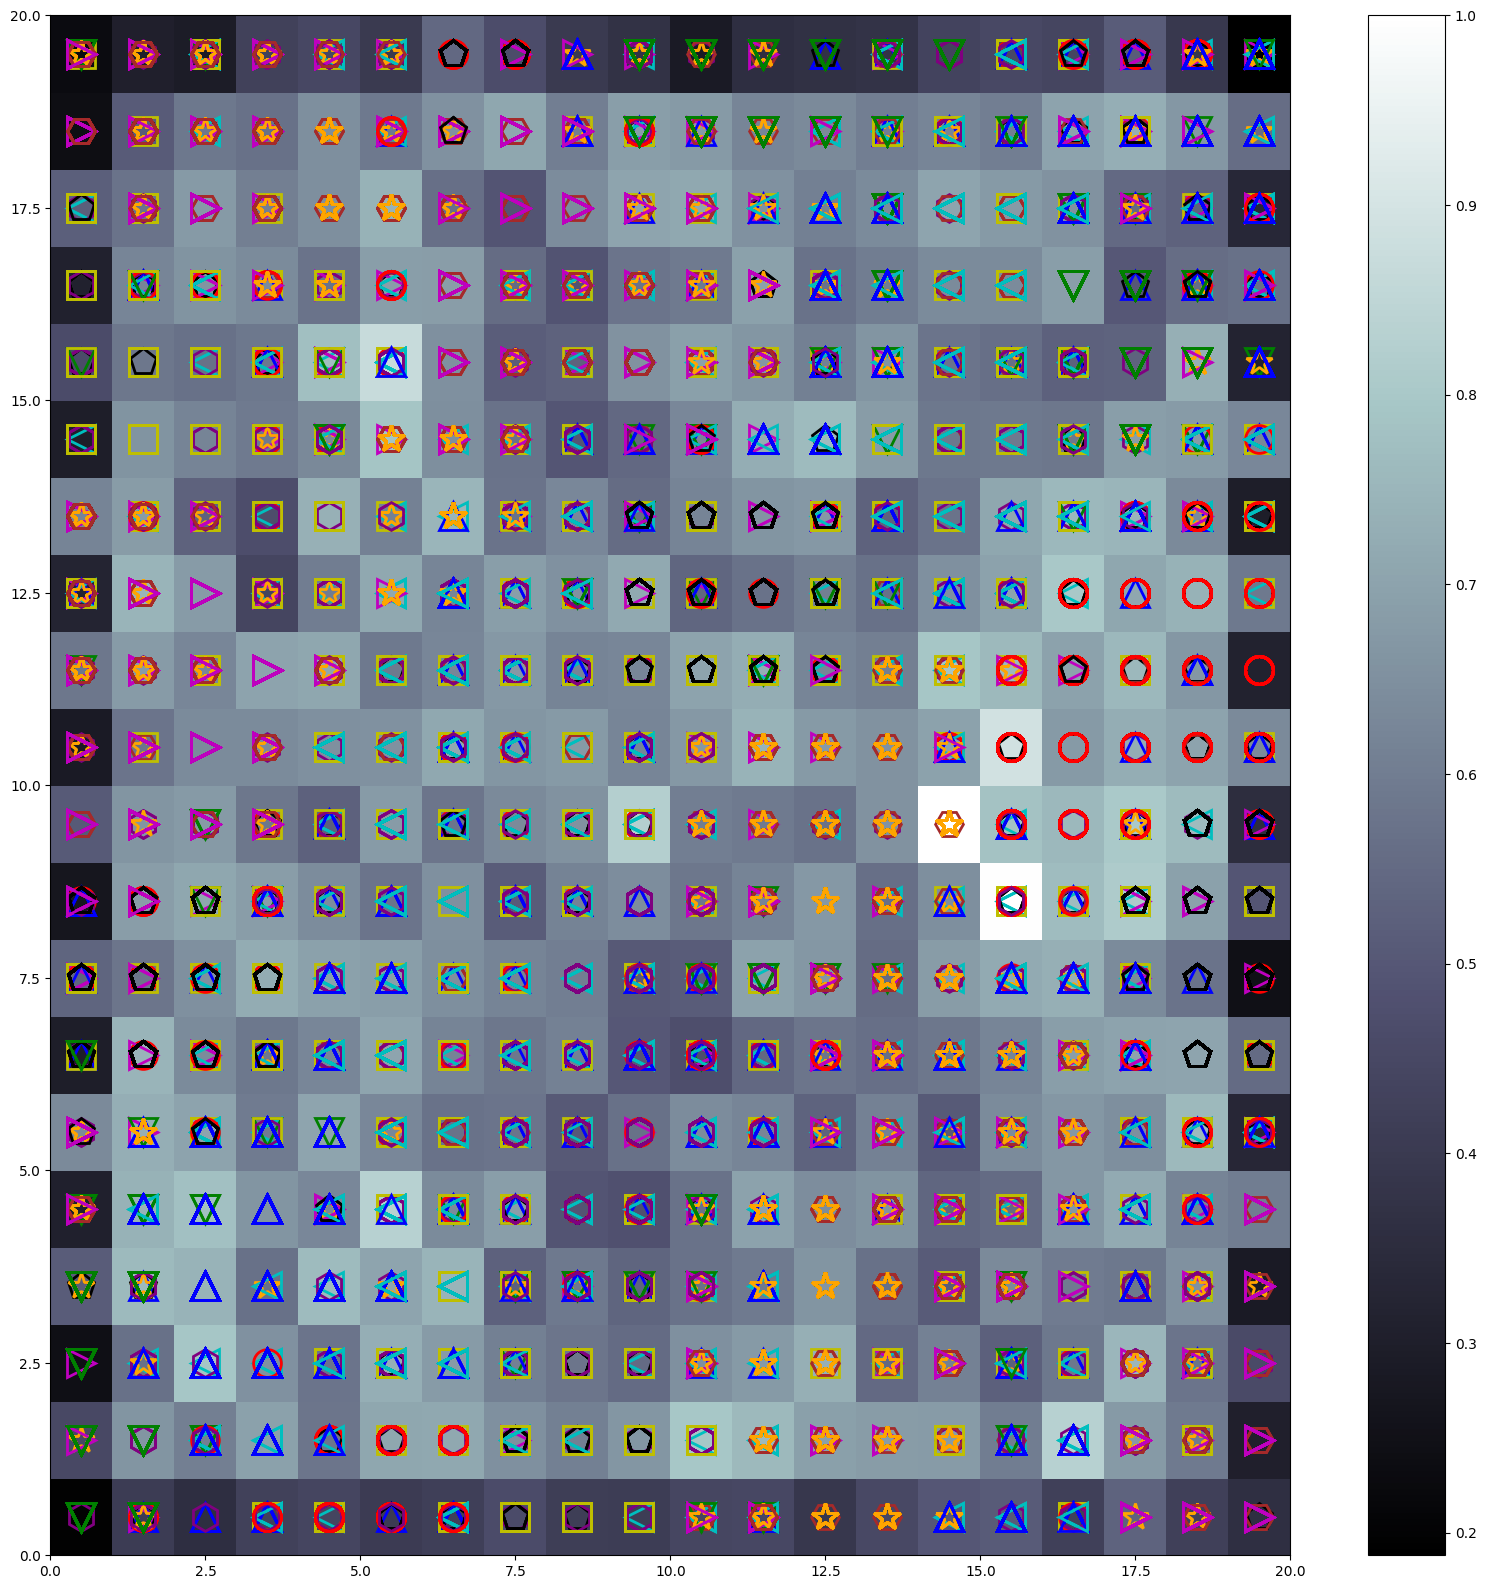

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
from pylab import rcParams

max_iter = 5000
alpha_max = 0.5

Xi = X_train_edges_reshaped
Yi = y_train

som = MiniSom(x=20, y=20, input_len=784, sigma=1.0, learning_rate=alpha_max,activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian')
som.random_weights_init(Xi)
som.train_random(data=Xi, num_iteration=max_iter)

# Configurar el tamaño de la figura
rcParams['figure.figsize'] = 20, 20

# Inicializar la figura
bone()

# Visualizar la matriz de distancias
pcolor(som.distance_map().T)

# Mostrar la barra de colores
colorbar()

# Crear una matriz para almacenar las etiquetas
valores = [0,1,2,3,4,5,6,7,8,9]
M = np.zeros([20,20],np.float32) - 1
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H']  # 10 markers
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']  # 10 colors

# Recorrer los datos y asignar las etiquetas
for i, x in enumerate(Xi):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[Yi[i]],
         markeredgecolor=colors[Yi[i]],
         markerfacecolor='None',
         markersize=20,
         markeredgewidth=2)
    M[w[0],w[1]] = Yi[i]
show()

In [6]:
#  Preparar los datos de prueba (normalizar como lo hicimos con los datos de entrenamiento)
X_test = X_test / 255.0
X_test_reshaped = X_test.reshape(X_test.shape[0], 784)

# Crear un array de predicciones para los datos de prueba
Y_test_predicted = []

# Obtener las predicciones para los datos de prueba
for i in range(len(X_test_reshaped)):
    # Encontrar el ganador para cada muestra de prueba
    w = som.winner(X_test_reshaped[i])
    # Obtener la clase predicha basada en el ganador de la neurona
    Y_test_predicted.append(M[w])

# Convertir las predicciones a un array numpy
Y_test_predicted = np.array(Y_test_predicted)

# Calcular y mostrar métricas
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("Reporte de Clasificación para Datos de Prueba:")
print(classification_report(y_test, Y_test_predicted))


Reporte de Clasificación para Datos de Prueba:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.10      1.00      0.18       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/home/sergio/Documents/sixth/mov/api-for-somnn/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sergio/Documents/sixth/mov/api-for-somnn/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sergio/Documents/sixth/mov/api-for-somnn/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.